In [1]:
import pandas as pd
import numpy as np
import math
import string
import nltk 
import re
from nltk import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures
from collections import Counter
from nltk.util import ngrams

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [2]:
# Reading the text from text file and make a dataframe
l_col1 = []
with open("../data/text.txt","r") as file:
    lines = file.readlines()
    for ind, line in enumerate(lines[:-1]):
        l_col1.append(line)
df= pd.DataFrame({'sentences': l_col1})
df

,sentences
0,"As a term, data analytics predominantly refers..."
1,"intelligence (BI), reporting and online analyt..."
2,"analytics.In that sense, it's similar in natur..."
3,approaches to analyzing data --with the differ...
4,data analytics has a broader focus. The expans...
5,"cases, people use data analytics specifically ..."
6,category. Data analytics initiatives can help...
7,"efficiency, optimize marketing campaigns and c..."
8,emerging market trends and gain a competitive ...
9,boosting business performance. Depending on th...


In [3]:
# Apply first round of text cleaning techniques
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    #get rid of non english charectors
    text = re.sub("([^\x00-\x7F])+","",text)
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [4]:
# Let's take a look at the updated text
df['CleanedSentences'] = pd.DataFrame(df['sentences'].apply(round1))
df

,sentences,CleanedSentences
0,"As a term, data analytics predominantly refers...",as a term data analytics predominantly refers ...
1,"intelligence (BI), reporting and online analyt...",intelligence bi reporting and online analytica...
2,"analytics.In that sense, it's similar in natur...",analyticsin that sense its similar in nature t...
3,approaches to analyzing data --with the differ...,approaches to analyzing data with the differen...
4,data analytics has a broader focus. The expans...,data analytics has a broader focus the expansi...
5,"cases, people use data analytics specifically ...",cases people use data analytics specifically t...
6,category. Data analytics initiatives can help...,category data analytics initiatives can help ...
7,"efficiency, optimize marketing campaigns and c...",efficiency optimize marketing campaigns and cu...
8,emerging market trends and gain a competitive ...,emerging market trends and gain a competitive ...
9,boosting business performance. Depending on th...,boosting business performance depending on the...


In [5]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

#tokenizing and removing stop words
stop_words = set(stopwords.words('english'))
df['tokenizeSentences'] = None
for i in df.index:
    word_tokens = word_tokenize(df['CleanedSentences'][i])
    df['CleanedSentences'][i] = [w for w in word_tokens if not w in stop_words] 
    
    
    Deleted_list = [',']
    
    word_tokens = word_tokenize(df['sentences'][i])
    df['tokenizeSentences'][i] = [w for w in word_tokens if not w in Deleted_list]
    
    
df.head()

,sentences,CleanedSentences,tokenizeSentences
0,"As a term, data analytics predominantly refers...","[term, data, analytics, predominantly, refers,...","[As, a, term, data, analytics, predominantly, ..."
1,"intelligence (BI), reporting and online analyt...","[intelligence, bi, reporting, online, analytic...","[intelligence, (, BI, ), reporting, and, onlin..."
2,"analytics.In that sense, it's similar in natur...","[analyticsin, sense, similar, nature, business...","[analytics.In, that, sense, it, 's, similar, i..."
3,approaches to analyzing data --with the differ...,"[approaches, analyzing, data, difference, latt...","[approaches, to, analyzing, data, --, with, th..."
4,data analytics has a broader focus. The expans...,"[data, analytics, broader, focus, expansive, v...","[data, analytics, has, a, broader, focus, ., T..."


In [6]:
#  using nltk WordNetLemmatizer function to normalize the tweets
# Text Normalization -reducing terms to their base word(like runs, run, running, ran to base word run)
lemmatizer = WordNetLemmatizer()
df['CleanedSentences'] = df['CleanedSentences'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])


for i in range(len(df['CleanedSentences'])):
    df['CleanedSentences'][i] = ' '.join(df['CleanedSentences'][i])    

df.head()

,sentences,CleanedSentences,tokenizeSentences
0,"As a term, data analytics predominantly refers...",term data analytics predominantly refers assor...,"[As, a, term, data, analytics, predominantly, ..."
1,"intelligence (BI), reporting and online analyt...",intelligence bi reporting online analytical pr...,"[intelligence, (, BI, ), reporting, and, onlin..."
2,"analytics.In that sense, it's similar in natur...",analyticsin sense similar nature business anal...,"[analytics.In, that, sense, it, 's, similar, i..."
3,approaches to analyzing data --with the differ...,approach analyzing data difference latter orie...,"[approaches, to, analyzing, data, --, with, th..."
4,data analytics has a broader focus. The expans...,data analytics broader focus expansive view te...,"[data, analytics, has, a, broader, focus, ., T..."


In [7]:
#create a new column for tokens
df['tokenizedWords'] = df['CleanedSentences'].apply(lambda x: x.split())

In [8]:
# count the number of words in each doc
word_count_list = np.zeros(df.shape[0], dtype=np.int)
doc_list = df['CleanedSentences'].values
for i in df.index:
    word_count_list[i] = len(doc_list[i].split())

# add the word count as a new column
df['word_count'] = word_count_list

df.head()


,sentences,CleanedSentences,tokenizeSentences,tokenizedWords,word_count
0,"As a term, data analytics predominantly refers...",term data analytics predominantly refers assor...,"[As, a, term, data, analytics, predominantly, ...","[term, data, analytics, predominantly, refers,...",9
1,"intelligence (BI), reporting and online analyt...",intelligence bi reporting online analytical pr...,"[intelligence, (, BI, ), reporting, and, onlin...","[intelligence, bi, reporting, online, analytic...",10
2,"analytics.In that sense, it's similar in natur...",analyticsin sense similar nature business anal...,"[analytics.In, that, sense, it, 's, similar, i...","[analyticsin, sense, similar, nature, business...",9
3,approaches to analyzing data --with the differ...,approach analyzing data difference latter orie...,"[approaches, to, analyzing, data, --, with, th...","[approach, analyzing, data, difference, latter...",8
4,data analytics has a broader focus. The expans...,data analytics broader focus expansive view te...,"[data, analytics, has, a, broader, focus, ., T...","[data, analytics, broader, focus, expansive, v...",10


In [9]:
def word_count_Line(df):
    temp = []
    for l in df.CleanedSentences.values:
        counts = dict()
        words = l.split()

        for word in words:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
        temp.append(counts)  
    df['word_count_line']=temp

In [10]:
word_count_Line(df)

In [11]:
def word_prob(df,col,word):
    i = 0
    p = 0
    for my_dict in df[col]:
        for k,v in my_dict.items():
            if k == word:
                p = (v/df['word_count'][i])
        print("Probability of the '{0}' occuring in line {1} is {2}".format(word,i,p))
        p = 0
        i = i+1

In [12]:
word_prob(df,'word_count_line','data')

Probability of the 'data' occuring in line 0 is 0.1111111111111111
Probability of the 'data' occuring in line 1 is 0
Probability of the 'data' occuring in line 2 is 0
Probability of the 'data' occuring in line 3 is 0.125
Probability of the 'data' occuring in line 4 is 0.1
Probability of the 'data' occuring in line 5 is 0.08333333333333333
Probability of the 'data' occuring in line 6 is 0.1
Probability of the 'data' occuring in line 7 is 0
Probability of the 'data' occuring in line 8 is 0
Probability of the 'data' occuring in line 9 is 0.1111111111111111
Probability of the 'data' occuring in line 10 is 0
Probability of the 'data' occuring in line 11 is 0.1
Probability of the 'data' occuring in line 12 is 0.16666666666666666
Probability of the 'data' occuring in line 13 is 0.2222222222222222
Probability of the 'data' occuring in line 14 is 0.1
Probability of the 'data' occuring in line 15 is 0
Probability of the 'data' occuring in line 16 is 0.16666666666666666
Probability of the 'data' 

### A. Above function shows the probability of word 'data' appearing in each line

In [13]:
# make a new df to store words
columns=['text_index', 'word']
word_df_stopwords = pd.DataFrame(columns=columns)
# convert df to array to improve loop time performance
words = df['tokenizeSentences'].values
    
for i in df.index:
    temp = [[str(i), w] for w in words[i]]
    temp_df = pd.DataFrame(temp, columns=columns)
    # add 1 row for each word
    word_df_stopwords = word_df_stopwords.append(temp_df, ignore_index=True)
    
word_df_stopwords.head()

,text_index,word
0,0,As
1,0,a
2,0,term
3,0,data
4,0,analytics


In [14]:
# make a new df to store words
columns=['text_index', 'word']
word_df = pd.DataFrame(columns=columns)
# convert df to array to improve loop time performance
words = df['tokenizedWords'].values
    
for i in df.index:
    temp = [[str(i), w] for w in words[i]]
    temp_df = pd.DataFrame(temp, columns=columns)
    # add 1 row for each word
    word_df = word_df.append(temp_df, ignore_index=True)
    
word_df.head()

,text_index,word
0,0,term
1,0,data
2,0,analytics
3,0,predominantly
4,0,refers


In [15]:
# function to find the most frequent values in a column and their frequencies
from collections import Counter
def most_commons(df, cl_name):
    return pd.DataFrame(Counter(df[cl_name]).most_common(), columns=[cl_name, 'frequency'])

# top most frequently mentioned named entities
(most_commons(word_df, 'word')).head()

,word,frequency
0,data,18
1,analytics,9
2,analysis,6
3,business,5
4,term,3


Table above shows the top 5 words appear the most in the text with their respective frequency.

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

def barchart_words(word_df,title):
    
    temp_word = word_df.word.tolist()
    temp_freq = word_df.frequency.tolist()

    y_pos = np.arange(len(temp_word))

    plt.barh(y_pos, temp_freq, align='center', alpha=0.5 , 
             color=['black', 'red', 'green', 'blue', 'cyan','magenta','yellow','Purple','orange','Brown'])
    plt.yticks(y_pos, temp_word)
    plt.xlabel('count')
    plt.title(title)

    plt.show()

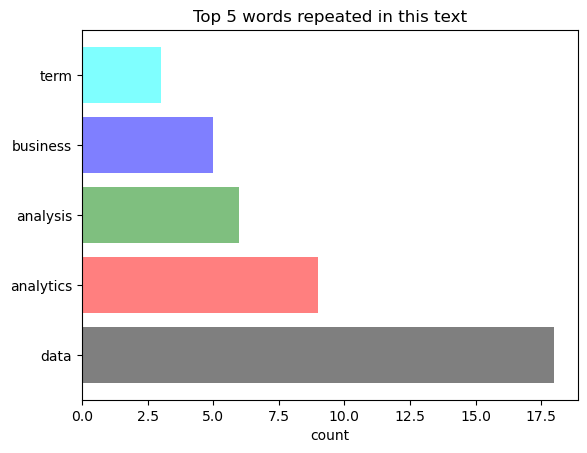

In [17]:
barchart_words((most_commons(word_df, 'word')).head(),'Top 5 words repeated in this text')

In [18]:
# plot word cloud of a given text
from wordcloud import WordCloud, STOPWORDS
def plot_word_cloud(df, colormap='bwr', title=None, width=1000, height=800):
    # set the stop words
    stopwords = set(STOPWORDS)
    Additional_stop_words = ['']
    words = (' '.join(df['word'])).lower()
    for s in  Additional_stop_words:
        stopwords.add(s)
        
    # generate WordCloud
    if type(words)==str:
        wc = WordCloud(background_color="white", stopwords=stopwords, 
                       width=width, height=height, colormap=colormap).generate(words)
    # for simplicity, I assume that if words is not an string, it is a dictionary of word frequencies
    else:
        wc = WordCloud(background_color="white", stopwords=stopwords, 
                       width=width, height=height, colormap=colormap).generate_from_frequencies(words)

    # show the WordCloud
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=25, y=1.01)

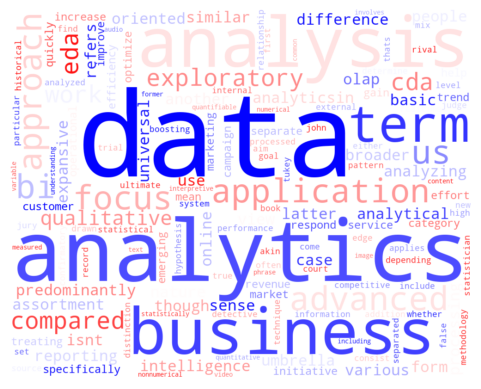

In [19]:
plot_word_cloud(word_df)

Wordcloud above shows the popularity distributions of each word in the text.

In [20]:
temp_df = most_commons(word_df, 'word')
temp_df2 = most_commons(word_df_stopwords, 'word')

print("There are'{0}' words (without stop words) or '{1}' words (with stop words) distinct words in text".format(temp_df.shape[0],temp_df2.shape[0]))

temp_df.head(153)

There are'153' words (without stop words) or '202' words (with stop words) distinct words in text


,word,frequency
0,data,18
1,analytics,9
2,analysis,6
3,business,5
4,term,3
...,...,...
148,audio,1
149,video,1
150,including,1
151,common,1


### b. There are 153 words (without the stop words) or 202 words (with stop words) distinct words in text

In [21]:
temp = most_commons(word_df, 'word')
for i in temp.index:
    print("Probability of the '{0}' occuring in text {1}".format(temp.word[i],temp.frequency[i]/temp.shape[0]))

Probability of the 'data' occuring in text 0.11764705882352941
Probability of the 'analytics' occuring in text 0.058823529411764705
Probability of the 'analysis' occuring in text 0.0392156862745098
Probability of the 'business' occuring in text 0.032679738562091505
Probability of the 'term' occuring in text 0.0196078431372549
Probability of the 'application' occuring in text 0.013071895424836602
Probability of the 'bi' occuring in text 0.013071895424836602
Probability of the 'advanced' occuring in text 0.013071895424836602
Probability of the 'approach' occuring in text 0.013071895424836602
Probability of the 'us' occuring in text 0.013071895424836602
Probability of the 'focus' occuring in text 0.013071895424836602
Probability of the 'exploratory' occuring in text 0.013071895424836602
Probability of the 'eda' occuring in text 0.013071895424836602
Probability of the 'cda' occuring in text 0.013071895424836602
Probability of the 'compared' occuring in text 0.013071895424836602
Probability

In [22]:
def getNGrams(wordlist, n):
    ng = []
    for i in range(len(wordlist)-(n-1)):
        ng.append(wordlist[i:i+n])
    return ng

def NGramsFlatList(df):
    ng = []
    flat_list = []
    temp = []
    for i in df.index:
        temp.append(df['tokenizedWords'][i])
    for sublist in temp:
        for item in sublist:
            flat_list.append(item)
    return flat_list

In [23]:
def twoWords(df,word_df,First,Second):
    unifl = NGramsFlatList(df)
    bifl = getNGrams(unifl,2)
    noOccurance = bifl.count([First,Second])
    FirstWordOccurance = ((word_df[word_df['word'] == First]).count()).word
    print("Probability of word '{0}' occuring after word '{1}' is: {2}".format(First,Second,(noOccurance/FirstWordOccurance)))

In [24]:
twoWords(df,word_df,'data','analytics')

Probability of word 'data' occuring after word 'analytics' is: 0.3333333333333333


### c. Probability of word 'data' occuring after word 'analytics' is: 0.3333333333333333
